In [1]:
import os 
from glob import glob

import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import seaborn as sns

outdir = '../../../results/paired_motifs/summary'
os.makedirs(outdir, exist_ok=True)

In [2]:
mp_data_dir = '/mnt/bioadhoc-temp/Groups/vd-ay/jreyna/projects/motif_pair_enrichment/results/rignacio_work/Motif_Pairs_100000_only_chr/'
glob_path = mp_data_dir + '{SAMPLE_BATCH}/{SAMPLE_NAME}/Q_values_sig-*.biorep_merged_top_50_count.csv'

In [3]:
fns = glob(glob_path.format(SAMPLE_BATCH='*', SAMPLE_NAME='*'))

In [4]:
data = []
for fn in fns:

    sample_set, sample_name = fn.split('/')[-3:-1]

    tdf = pd.read_table(fn, sep=',')
    tdf['sample_set'] = sample_set
    tdf['sample_name'] = sample_name
    data.append(tdf)

all_df = pd.concat(data)
all_df.drop('Unnamed: 0', axis=1, inplace=True)
all_df = all_df.loc[all_df['Q_value'] < 0.05]
all_df['Pair'] = all_df['Pair'].replace("[()\s']", '', regex=True)
all_df['Pair_1'] = all_df['Pair_1'].replace("[()'\s]", '', regex=True)
all_df['Pair_2'] = all_df['Pair_2'].replace("[()'\s]", '', regex=True)

In [5]:

# sort the pairs before working with them
def sort_pairs(sr):
    pairs_list = [sr.Pair_1, sr.Pair_2]
    return(sorted(pairs_list))
anchor_sorted_1, anchor_sorted_2 = zip(*all_df.apply(sort_pairs, axis=1))
all_df.loc[:, 'anchor_sorted_1'] = anchor_sorted_1
all_df.loc[:, 'anchor_sorted_2'] = anchor_sorted_2
all_df.loc[:, 'pair_sorted'] = all_df.loc[:, 'anchor_sorted_1'] + ',' + all_df.loc[:, 'anchor_sorted_2']

In [6]:
all_df.head()

,Pair,Sim_Count,P_value,Obs_Count,Pair_1,Pair_2,Contain_1,Contain_2,Q_value,sample_set,sample_name,anchor_sorted_1,anchor_sorted_2,pair_sorted
68,"KLF5,PATZ1",15,0.00015,71,KLF5,PATZ1,True,True,0.045828,ctcf_test,HeLa-S3-shcontrol.GSE137849.Homo_Sapiens.CTCF....,KLF5,PATZ1,"KLF5,PATZ1"
574,"KLF5,MAZ",18,0.00018,43,KLF5,MAZ,True,True,0.045828,ctcf_test,HeLa-S3-shcontrol.GSE137849.Homo_Sapiens.CTCF....,KLF5,MAZ,"KLF5,MAZ"
600,"KLF5,ZNF148",13,0.00013,49,KLF5,ZNF148,True,True,0.045828,ctcf_test,HeLa-S3-shcontrol.GSE137849.Homo_Sapiens.CTCF....,KLF5,ZNF148,"KLF5,ZNF148"
1012,"THAP11,ZFP14",12,0.00012,9,THAP11,ZFP14,True,True,0.045828,ctcf_test,HeLa-S3-shcontrol.GSE137849.Homo_Sapiens.CTCF....,THAP11,ZFP14,"THAP11,ZFP14"
1199,"KLF15,KLF5",16,0.00016,61,KLF15,KLF5,True,True,0.045828,ctcf_test,HeLa-S3-shcontrol.GSE137849.Homo_Sapiens.CTCF....,KLF15,KLF5,"KLF15,KLF5"


In [7]:
all_df[['sample_set', 'sample_name']].drop_duplicates().groupby('sample_set').count()

,sample_name
sample_set,
a_plus,30
b_plus,19
ctcf_test,2


### Summary of Motif Pairs

In [8]:
mp_grps = all_df.groupby(['sample_set', 'pair_sorted']) 
mp_counts_ss = mp_grps.count()['Sim_Count'].to_frame()
mp_counts_ss.sort_values(['sample_set', 'Sim_Count'], ascending=[True, False], inplace=True)

In [9]:
mp_counts_ss.loc['a_plus']

,Sim_Count
pair_sorted,
"ZNF135,ZNF460",28
"ZNF460,ZNF460",25
"THAP1,ZNF320",20
"THAP11,THAP11",20
"CTCF,ZNF320",19
...,...
"ZNF384,ZNF384",1
"ZNF384,ZNF460",1
"ZNF384,ZNF768",1


In [10]:
mp_counts_ss.loc['b_plus']

,Sim_Count
pair_sorted,
"THAP11,THAP11",18
"ZNF460,ZNF460",12
"ZNF135,ZNF460",11
"KLF15,PATZ1",6
"KLF15,KLF15",5
...,...
"ZNF454,ZNF610",1
"ZNF454,ZNF93",1
"ZNF460,ZNF610",1


In [11]:
mp_counts_ss.loc['ctcf_test']

,Sim_Count
pair_sorted,
"EGR1,ZNF320",1
"KLF15,KLF5",1
"KLF16,ZNF320",1
"KLF5,MAZ",1
"KLF5,PATZ1",1
"KLF5,ZNF148",1
"SP3,ZNF320",1
"THAP11,ZFP14",1


### Summary of 1D Motif

In [12]:
left_df = all_df.drop(['anchor_sorted_2'], axis=1).rename(columns={'anchor_sorted_1': 'Motif'})
right_df = all_df.drop(['anchor_sorted_1'], axis=1).rename(columns={'anchor_sorted_2': 'Motif'})
oned_motif_df = pd.concat([left_df, right_df])

In [13]:
oned_motif_df.head()

,Pair,Sim_Count,P_value,Obs_Count,Pair_1,Pair_2,Contain_1,Contain_2,Q_value,sample_set,sample_name,Motif,pair_sorted
68,"KLF5,PATZ1",15,0.00015,71,KLF5,PATZ1,True,True,0.045828,ctcf_test,HeLa-S3-shcontrol.GSE137849.Homo_Sapiens.CTCF....,KLF5,"KLF5,PATZ1"
574,"KLF5,MAZ",18,0.00018,43,KLF5,MAZ,True,True,0.045828,ctcf_test,HeLa-S3-shcontrol.GSE137849.Homo_Sapiens.CTCF....,KLF5,"KLF5,MAZ"
600,"KLF5,ZNF148",13,0.00013,49,KLF5,ZNF148,True,True,0.045828,ctcf_test,HeLa-S3-shcontrol.GSE137849.Homo_Sapiens.CTCF....,KLF5,"KLF5,ZNF148"
1012,"THAP11,ZFP14",12,0.00012,9,THAP11,ZFP14,True,True,0.045828,ctcf_test,HeLa-S3-shcontrol.GSE137849.Homo_Sapiens.CTCF....,THAP11,"THAP11,ZFP14"
1199,"KLF15,KLF5",16,0.00016,61,KLF15,KLF5,True,True,0.045828,ctcf_test,HeLa-S3-shcontrol.GSE137849.Homo_Sapiens.CTCF....,KLF15,"KLF15,KLF5"


In [14]:
motif_grps = oned_motif_df.groupby(['sample_set', 'Motif']) 
motif_counts_ss = motif_grps.count()['Sim_Count'].to_frame()
motif_counts_ss.sort_values(['sample_set', 'Sim_Count'], ascending=[True, False], inplace=True)

In [15]:
motif_counts_ss.loc['a_plus']

,Sim_Count
Motif,
CTCF,277
ZNF320,236
THAP1,194
KLF9,165
KLF4,157
ASCL1,154
ZNF460,134
KLF5,125
ZNF768,113


In [16]:
motif_counts_ss.loc['b_plus']

,Sim_Count
Motif,
KLF15,95
PATZ1,91
KLF5,88
ZNF460,83
ZNF281,65
THAP11,64
KLF16,53
SP9,52
SP3,50


In [17]:
motif_counts_ss.loc['ctcf_test']

,Sim_Count
Motif,
KLF5,4
ZNF320,3
EGR1,1
KLF15,1
KLF16,1
MAZ,1
PATZ1,1
SP3,1
THAP11,1


#### Making a jointplot of the motif-pair frequencies for different sample sets 

#####  A+ Samples

In [18]:
curr_sample_set = 'a_plus'

# extract the counts for the current set
a_plus_counts = mp_counts_ss.loc[curr_sample_set]

# take the top n only
topn = 30
a_plus_counts = a_plus_counts.sort_values('Sim_Count', ascending=False).iloc[0:topn]

# convert the index into two columns and sort 
left_anchors, right_anchors = list(zip(*map(lambda x: x.split(','), a_plus_counts.index)))
a_plus_counts['anchor_sorted_1'] = left_anchors
a_plus_counts['anchor_sorted_2'] = right_anchors
a_plus_counts.sort_values(['anchor_sorted_1', 'anchor_sorted_1'], ascending=[True, True], inplace=True)

# add reverse in order to have a symmetric matrix after pivoting 
a_plus_counts_rev = a_plus_counts.rename(columns={'anchor_sorted_1': 'anchor_sorted_2', 'anchor_sorted_2': 'anchor_sorted_1'})
a_plus_counts = pd.concat([a_plus_counts, a_plus_counts_rev])

# pivot the data into matrix for and fillna
a_plus_counts_matrix = a_plus_counts.pivot_table(index='anchor_sorted_2', columns='anchor_sorted_1', values='Sim_Count', fill_value=0)
#a_plus_counts_matrix.fillna(0, inplace=True)

# reverse the index values 
rev_index = list(reversed(sorted(a_plus_counts_matrix.index)))
a_plus_counts_matrix = a_plus_counts_matrix.loc[rev_index]

a_plus_counts_matrix.shape

(23, 23)

In [19]:
# calculate frequencies for the column panel
col_idxs = a_plus_counts_matrix.columns.tolist()
col_oned_motif_counts = motif_counts_ss.loc[curr_sample_set].loc[col_idxs].reset_index()

# calculate frequencies for the row panel
row_idxs = a_plus_counts_matrix.index.tolist()
row_oned_motif_counts = a_plus_counts_matrix.sum().loc[row_idxs].to_frame().reset_index()
row_oned_motif_counts.columns = ['Motif', 'topn_freq']

# calculating the number 
num_a_samples = all_df.loc[all_df.sample_set == curr_sample_set].drop_duplicates(['sample_set', 'sample_name']).shape[0]

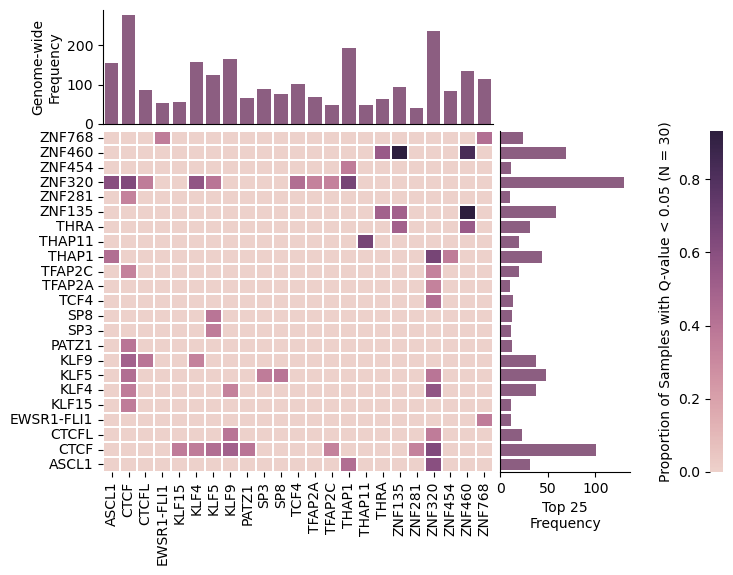

In [20]:
fig = plt.figure(figsize=(8, 6))

hspace = 0.03
wspace = 0.05

purple_rgb = tuple([0.57916573903086, 0.33934576125314425, 0.5219003947563425])

# making the gridspec and separating each piece
grid = GridSpec(2, 4, figure=fig, height_ratios=[1, 3], width_ratios=[3, 1, 0.5, 0.1], hspace=hspace, wspace=wspace)

top_panel = fig.add_subplot(grid[0, 0])
large_box = fig.add_subplot(grid[1, 0])

right_panel = fig.add_subplot(grid[1, 1])
legend_panel = fig.add_subplot(grid[1, 3])

# drawing a heatmap in the large box
#sns.heatmap(a_plus_counts_matrix, robust=False, ax=large_box, xticklabels=True, yticklabels=True, cbar_kws={'location': 'bottom'})
sns.heatmap(a_plus_counts_matrix / num_a_samples, robust=False, ax=large_box, 
            xticklabels=True, yticklabels=True,
            cbar=True, cbar_ax=legend_panel, 
            cmap=sns.cubehelix_palette(as_cmap=True), linewidths=0.003,
            cbar_kws={'label': 'Proportion of Samples with Q-value < 0.05 (N = {})'.format(num_a_samples), 'location': 'left'})
large_box.set(xlabel='', ylabel='')

# drawing a barplot of 1D motif frequencies across the whole genome
sns.barplot(x='Motif', y='Sim_Count', data=col_oned_motif_counts, color=purple_rgb, ax=top_panel)
top_panel.set(xticklabels=[], xlabel='', ylabel='Genome-wide\nFrequency', xticks=[])
sns.despine(ax=top_panel, right=True, top=True)

# drawing a barplot of 1D motif frequencies across the top 25 motif pairs
sns.barplot(y='Motif', x='topn_freq', data=row_oned_motif_counts, color=purple_rgb, ax=right_panel)
right_panel.set(yticklabels=[], ylabel='', xlabel='Top 25\nFrequency', yticks=[])
sns.despine(ax=right_panel, right=True, top=True)

# save the figure 
fn = os.path.join(outdir, 'motif_pair_distributions.{}.V1.png'.format(curr_sample_set))
fig.savefig(fn, dpi=600, bbox_inches='tight')

#####  B+ Samples

In [21]:
curr_sample_set = 'b_plus'

# extract the counts for the current set
a_plus_counts = mp_counts_ss.loc[curr_sample_set]

# take the top n only
topn = 30
a_plus_counts = a_plus_counts.sort_values('Sim_Count', ascending=False).iloc[0:topn]

# convert the index into two columns and sort 
left_anchors, right_anchors = list(zip(*map(lambda x: x.split(','), a_plus_counts.index)))
a_plus_counts['anchor_sorted_1'] = left_anchors
a_plus_counts['anchor_sorted_2'] = right_anchors
a_plus_counts.sort_values(['anchor_sorted_1', 'anchor_sorted_1'], ascending=[True, True], inplace=True)

# add reverse in order to have a symmetric matrix after pivoting 
a_plus_counts_rev = a_plus_counts.rename(columns={'anchor_sorted_1': 'anchor_sorted_2', 'anchor_sorted_2': 'anchor_sorted_1'})
a_plus_counts = pd.concat([a_plus_counts, a_plus_counts_rev])

# pivot the data into matrix for and fillna
a_plus_counts_matrix = a_plus_counts.pivot_table(index='anchor_sorted_2', columns='anchor_sorted_1', values='Sim_Count', fill_value=0)
#a_plus_counts_matrix.fillna(0, inplace=True)

# reverse the index values 
rev_index = list(reversed(sorted(a_plus_counts_matrix.index)))
a_plus_counts_matrix = a_plus_counts_matrix.loc[rev_index]

a_plus_counts_matrix.shape

(20, 20)

In [22]:
# calculate frequencies for the column panel
col_idxs = a_plus_counts_matrix.columns.tolist()
col_oned_motif_counts = motif_counts_ss.loc[curr_sample_set].loc[col_idxs].reset_index()

# calculate frequencies for the row panel
row_idxs = a_plus_counts_matrix.index.tolist()
row_oned_motif_counts = a_plus_counts_matrix.sum().loc[row_idxs].to_frame().reset_index()
row_oned_motif_counts.columns = ['Motif', 'topn_freq']

# calculating the number 
num_a_samples = all_df.loc[all_df.sample_set == curr_sample_set].drop_duplicates(['sample_set', 'sample_name']).shape[0]

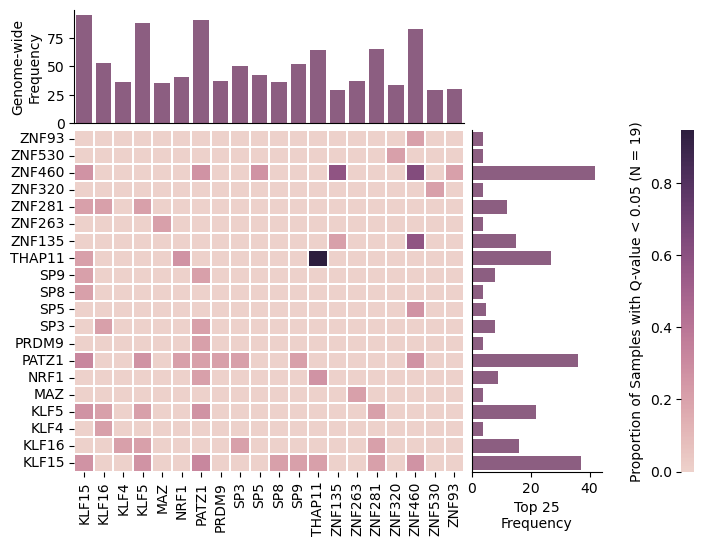

In [23]:
fig = plt.figure(figsize=(8, 6))

hspace = 0.03
wspace = 0.05

purple_rgb = tuple([0.57916573903086, 0.33934576125314425, 0.5219003947563425])

# making the gridspec and separating each piece
grid = GridSpec(2, 4, figure=fig, height_ratios=[1, 3], width_ratios=[3, 1, 0.5, 0.1], hspace=hspace, wspace=wspace)

top_panel = fig.add_subplot(grid[0, 0])
large_box = fig.add_subplot(grid[1, 0])

right_panel = fig.add_subplot(grid[1, 1])
legend_panel = fig.add_subplot(grid[1, 3])

# drawing a heatmap in the large box
#sns.heatmap(a_plus_counts_matrix, robust=False, ax=large_box, xticklabels=True, yticklabels=True, cbar_kws={'location': 'bottom'})
sns.heatmap(a_plus_counts_matrix / num_a_samples, robust=False, ax=large_box, 
            xticklabels=True, yticklabels=True,
            cbar=True, cbar_ax=legend_panel, 
            cmap=sns.cubehelix_palette(as_cmap=True), linewidths=0.003,
            cbar_kws={'label': 'Proportion of Samples with Q-value < 0.05 (N = {})'.format(num_a_samples), 'location': 'left'})
large_box.set(xlabel='', ylabel='')

# drawing a barplot of 1D motif frequencies across the whole genome
sns.barplot(x='Motif', y='Sim_Count', data=col_oned_motif_counts, color=purple_rgb, ax=top_panel)
top_panel.set(xticklabels=[], xlabel='', ylabel='Genome-wide\nFrequency', xticks=[])
sns.despine(ax=top_panel, right=True, top=True)

# drawing a barplot of 1D motif frequencies across the top 25 motif pairs
sns.barplot(y='Motif', x='topn_freq', data=row_oned_motif_counts, color=purple_rgb, ax=right_panel)
right_panel.set(yticklabels=[], ylabel='', xlabel='Top 25\nFrequency', yticks=[])
sns.despine(ax=right_panel, right=True, top=True)

# save the figure 
fn = os.path.join(outdir, 'motif_pair_distributions.{}.V1.png'.format(curr_sample_set))
fig.savefig(fn, dpi=600, bbox_inches='tight')

##### CTCF Samples

In [24]:
curr_sample_set = 'ctcf_test'

# extract the counts for the current set
a_plus_counts = mp_counts_ss.loc[curr_sample_set]

# take the top n only
topn = 30
a_plus_counts = a_plus_counts.sort_values('Sim_Count', ascending=False).iloc[0:topn]

# convert the index into two columns and sort 
left_anchors, right_anchors = list(zip(*map(lambda x: x.split(','), a_plus_counts.index)))
a_plus_counts['anchor_sorted_1'] = left_anchors
a_plus_counts['anchor_sorted_2'] = right_anchors
a_plus_counts.sort_values(['anchor_sorted_1', 'anchor_sorted_1'], ascending=[True, True], inplace=True)

# add reverse in order to have a symmetric matrix after pivoting 
a_plus_counts_rev = a_plus_counts.rename(columns={'anchor_sorted_1': 'anchor_sorted_2', 'anchor_sorted_2': 'anchor_sorted_1'})
a_plus_counts = pd.concat([a_plus_counts, a_plus_counts_rev])

# pivot the data into matrix for and fillna
a_plus_counts_matrix = a_plus_counts.pivot_table(index='anchor_sorted_2', columns='anchor_sorted_1', values='Sim_Count', fill_value=0)
#a_plus_counts_matrix.fillna(0, inplace=True)

# reverse the index values 
rev_index = list(reversed(sorted(a_plus_counts_matrix.index)))
a_plus_counts_matrix = a_plus_counts_matrix.loc[rev_index]

a_plus_counts_matrix.shape

(11, 11)

In [25]:
# calculate frequencies for the column panel
col_idxs = a_plus_counts_matrix.columns.tolist()
col_oned_motif_counts = motif_counts_ss.loc[curr_sample_set].loc[col_idxs].reset_index()

# calculate frequencies for the row panel
row_idxs = a_plus_counts_matrix.index.tolist()
row_oned_motif_counts = a_plus_counts_matrix.sum().loc[row_idxs].to_frame().reset_index()
row_oned_motif_counts.columns = ['Motif', 'topn_freq']

# calculating the number 
num_a_samples = all_df.loc[all_df.sample_set == curr_sample_set].drop_duplicates(['sample_set', 'sample_name']).sample_name.nunique()

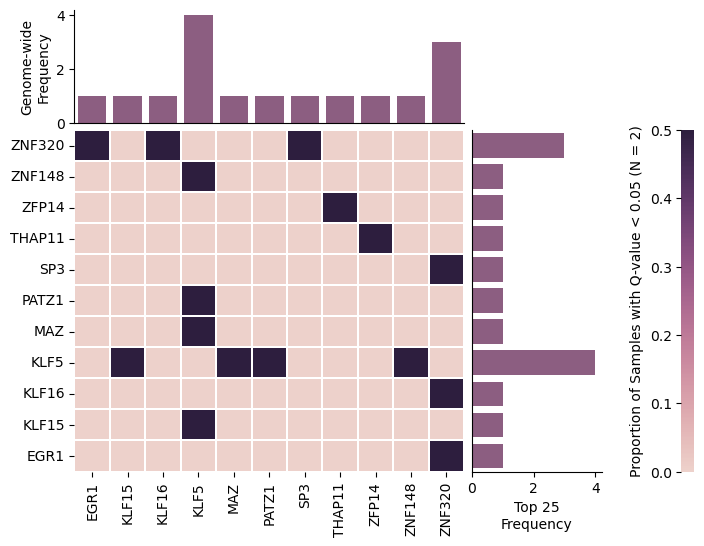

In [26]:
fig = plt.figure(figsize=(8, 6))

hspace = 0.03
wspace = 0.05

purple_rgb = tuple([0.57916573903086, 0.33934576125314425, 0.5219003947563425])

# making the gridspec and separating each piece
grid = GridSpec(2, 4, figure=fig, height_ratios=[1, 3], width_ratios=[3, 1, 0.5, 0.1], hspace=hspace, wspace=wspace)

top_panel = fig.add_subplot(grid[0, 0])
large_box = fig.add_subplot(grid[1, 0])

right_panel = fig.add_subplot(grid[1, 1])
legend_panel = fig.add_subplot(grid[1, 3])

# drawing a heatmap in the large box
#sns.heatmap(a_plus_counts_matrix, robust=False, ax=large_box, xticklabels=True, yticklabels=True, cbar_kws={'location': 'bottom'})
sns.heatmap(a_plus_counts_matrix / num_a_samples, robust=False, ax=large_box, 
            xticklabels=True, yticklabels=True,
            cbar=True, cbar_ax=legend_panel, 
            cmap=sns.cubehelix_palette(as_cmap=True), linewidths=0.003,
            cbar_kws={'label': 'Proportion of Samples with Q-value < 0.05 (N = {})'.format(num_a_samples), 'location': 'left'})
large_box.set(xlabel='', ylabel='')

# drawing a barplot of 1D motif frequencies across the whole genome
sns.barplot(x='Motif', y='Sim_Count', data=col_oned_motif_counts, color=purple_rgb, ax=top_panel)
top_panel.set(xticklabels=[], xlabel='', ylabel='Genome-wide\nFrequency', xticks=[])
sns.despine(ax=top_panel, right=True, top=True)

# drawing a barplot of 1D motif frequencies across the top 25 motif pairs
sns.barplot(y='Motif', x='topn_freq', data=row_oned_motif_counts, color=purple_rgb, ax=right_panel)
right_panel.set(yticklabels=[], ylabel='', xlabel='Top 25\nFrequency', yticks=[])
sns.despine(ax=right_panel, right=True, top=True)

# save the figure 
fn = os.path.join(outdir, 'motif_pair_distributions.{}.V1.png'.format(curr_sample_set))
fig.savefig(fn, dpi=600, bbox_inches='tight')

#####  A+/B+ Samples

In [27]:
curr_sample_set = ['a_plus', 'b_plus']
curr_sample_set_name = 'ab_plus'

# extract the counts for the current set
a_plus_counts = mp_counts_ss.loc[curr_sample_set]

# take the top n only
topn = 30
a_plus_counts = a_plus_counts.sort_values('Sim_Count', ascending=False).iloc[0:topn]
a_plus_counts = a_plus_counts.reset_index()
a_plus_counts = a_plus_counts.drop('sample_set', axis=1).groupby('pair_sorted').Sim_Count.agg(sum).to_frame().reset_index()

In [28]:
# convert the index into two columns and sort 
left_anchors, right_anchors = list(zip(*map(lambda x: x.split(','), a_plus_counts.pair_sorted)))
a_plus_counts['anchor_sorted_1'] = left_anchors
a_plus_counts['anchor_sorted_2'] = right_anchors
a_plus_counts.sort_values(['anchor_sorted_1', 'anchor_sorted_1'], ascending=[True, True], inplace=True)

# add reverse in order to have a symmetric matrix after pivoting 
a_plus_counts_rev = a_plus_counts.rename(columns={'anchor_sorted_1': 'anchor_sorted_2', 'anchor_sorted_2': 'anchor_sorted_1'})
a_plus_counts = pd.concat([a_plus_counts, a_plus_counts_rev])

# pivot the data into matrix for and fillna
a_plus_counts_matrix = a_plus_counts.pivot_table(index='anchor_sorted_2', columns='anchor_sorted_1', values='Sim_Count', fill_value=0)

# reverse the index values 
rev_index = list(reversed(sorted(a_plus_counts_matrix.index)))
a_plus_counts_matrix = a_plus_counts_matrix.loc[rev_index]
a_plus_counts_matrix.shape

(22, 22)

In [29]:
# calculate frequencies for the column panel
col_idxs = a_plus_counts_matrix.columns.tolist()
col_oned_motif_counts = motif_counts_ss.loc[(['a_plus', 'b_plus'], col_idxs),:].reset_index()
col_oned_motif_counts = col_oned_motif_counts.drop('sample_set', axis=1).groupby('Motif').Sim_Count.sum().reset_index()

# calculate frequencies for the row panel
row_idxs = a_plus_counts_matrix.index.tolist()
row_oned_motif_counts = a_plus_counts_matrix.sum()
row_oned_motif_counts = row_oned_motif_counts.loc[row_idxs].to_frame().reset_index()
row_oned_motif_counts.columns = ['Motif', 'topn_freq']

# calculating the number 
num_a_samples = all_df.loc[all_df.sample_set.isin(curr_sample_set)].drop_duplicates(['sample_set', 'sample_name']).shape[0]

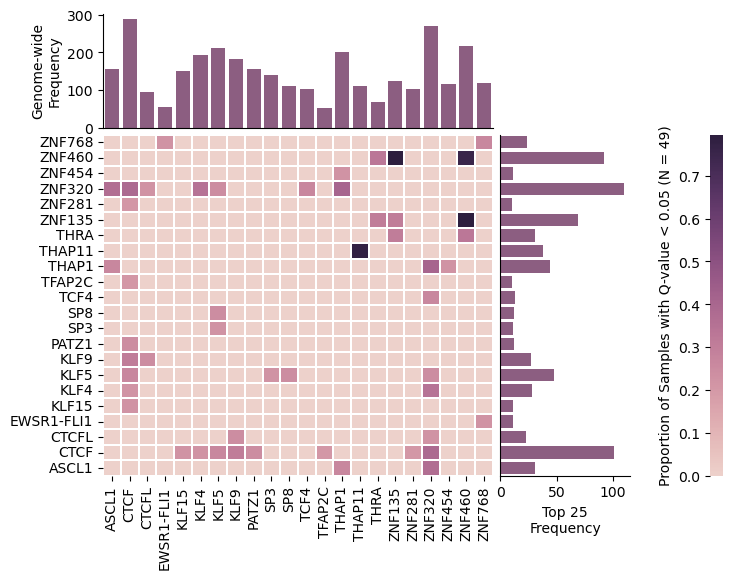

In [30]:
fig = plt.figure(figsize=(8, 6))

hspace = 0.03
wspace = 0.05

purple_rgb = tuple([0.57916573903086, 0.33934576125314425, 0.5219003947563425])

# making the gridspec and separating each piece
grid = GridSpec(2, 4, figure=fig, height_ratios=[1, 3], width_ratios=[3, 1, 0.5, 0.1], hspace=hspace, wspace=wspace)

top_panel = fig.add_subplot(grid[0, 0])
large_box = fig.add_subplot(grid[1, 0])

right_panel = fig.add_subplot(grid[1, 1])
legend_panel = fig.add_subplot(grid[1, 3])

# drawing a heatmap in the large box
#sns.heatmap(a_plus_counts_matrix, robust=False, ax=large_box, xticklabels=True, yticklabels=True, cbar_kws={'location': 'bottom'})
sns.heatmap(a_plus_counts_matrix / num_a_samples, robust=False, ax=large_box, 
            xticklabels=True, yticklabels=True,
            cbar=True, cbar_ax=legend_panel, 
            cmap=sns.cubehelix_palette(as_cmap=True), linewidths=0.003,
            cbar_kws={'label': 'Proportion of Samples with Q-value < 0.05 (N = {})'.format(num_a_samples), 'location': 'left'})
large_box.set(xlabel='', ylabel='')

# drawing a barplot of 1D motif frequencies across the whole genome
sns.barplot(x='Motif', y='Sim_Count', data=col_oned_motif_counts, color=purple_rgb, ax=top_panel)
top_panel.set(xticklabels=[], xlabel='', ylabel='Genome-wide\nFrequency', xticks=[])
sns.despine(ax=top_panel, right=True, top=True)

# drawing a barplot of 1D motif frequencies across the top 25 motif pairs
sns.barplot(y='Motif', x='topn_freq', data=row_oned_motif_counts, color=purple_rgb, ax=right_panel)
right_panel.set(yticklabels=[], ylabel='', xlabel='Top 25\nFrequency', yticks=[])
sns.despine(ax=right_panel, right=True, top=True)

# save the figure 
fn = os.path.join(outdir, 'motif_pair_distributions.{}.V1.png'.format(curr_sample_set_name))
fig.savefig(fn, dpi=600, bbox_inches='tight')

### Comparing overlap between A+ and B+ samples 
Taking those samples that are the same and just calculate an overlap of the top motif pairs